<a href="https://colab.research.google.com/github/fajararifi/spk_Fuzzy_G211200005/blob/main/Fuzzy_G_211_20_0005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=20bced30283793bc6a389405b169f1155beb99fd642946b628f83646e6ec875b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [3]:

base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [6]:


X = base.iloc[:,[1,25]].values



In [7]:

X.shape

(30000, 2)

In [8]:
X = base.iloc[:,[1,25]].values

In [9]:
X.shape

(30000, 2)

In [10]:
X.T.shape


(2, 30000)

In [11]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [12]:


r



(array([[ 308715.36781918, 1332273.10696429],
        [ 175796.12694755,  491928.05770646],
        [ 140102.34731189,   80565.65224641]]),
 array([[0.00987787, 0.00245833, 0.00185363, ..., 0.00684957, 0.01926969,
         0.01726452],
        [0.07016144, 0.01898459, 0.01813586, ..., 0.05751319, 0.38187469,
         0.26316295],
        [0.91996069, 0.97855708, 0.98001051, ..., 0.93563724, 0.59885562,
         0.71957254]]),
 array([[0.15808787, 0.47670178, 0.38784984, ..., 0.21035438, 0.24691037,
         0.77536719],
        [0.06974155, 0.28847009, 0.05573884, ..., 0.18877937, 0.5026505 ,
         0.09505226],
        [0.77217058, 0.23482813, 0.55641132, ..., 0.60086626, 0.25043913,
         0.12958056]]),
 array([[1355669.5330128 , 1328666.35760267, 1249904.90029645, ...,
         1292193.3771374 , 1089929.55996992, 1131376.87547852],
        [ 508670.19888486,  478117.9088753 ,  399594.28933229, ...,
          445938.88583034,  244836.01538917,  289782.48152711],
        [ 140475

In [13]:

previsoes_porcentagem = r[1]

In [14]:
previsoes_porcentagem.shape

(3, 30000)

In [15]:
previsoes_porcentagem

array([[0.00987787, 0.00245833, 0.00185363, ..., 0.00684957, 0.01926969,
        0.01726452],
       [0.07016144, 0.01898459, 0.01813586, ..., 0.05751319, 0.38187469,
        0.26316295],
       [0.91996069, 0.97855708, 0.98001051, ..., 0.93563724, 0.59885562,
        0.71957254]])

In [16]:
previsoes_porcentagem[0][0]

0.009877871919742223

In [17]:
previsoes_porcentagem[1][0]

0.07016143664384196

In [18]:
previsoes_porcentagem[2][0]

0.9199606914364159

In [19]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [20]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [21]:

previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [22]:
previsoes[5000]

2

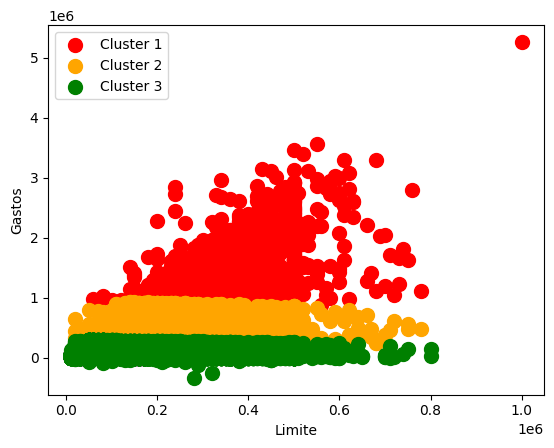

In [23]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();